# 2.2.3

$f(x) = e^x + 1 - \sqrt{9-x^2}$

In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
#import math

## Метод бисекции

In [2]:
def func(x):
    return np.exp(x) + 1 - np.sqrt(9 - x**2)

In [3]:
x = np.linspace(-3,3,100)
y = func(x)

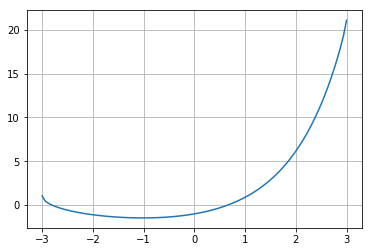

In [4]:
plt.plot(x,y)
plt.grid(True);

In [5]:
a = 0
b = 1
eps = 1e-6
def bisection(a,b,eps = 1e-6, func = func):
    it_num = 0
    while np.abs(b-a) > eps:
        it_num += 1
        c = (a + b) / 2
        if func(c) * func(a) <= 0:
            b = c
        else: a = c
    return [(a+b)/2, it_num]
result = bisection(a,b,eps)
print("\nAnswer = ", result[0], "after ", result[1], "iterarions")


Answer =  0.6561532020568848 after  20 iterarions


## Метод Ньютона

In [6]:
def phi(x):
    return (x*np.exp(x)*np.sqrt(9 - x**2) - np.exp(x)*np.sqrt(9 - x**2) - np.sqrt(9 - x**2) + 9) / (np.exp(x)*np.sqrt(9 - x**2) + x)

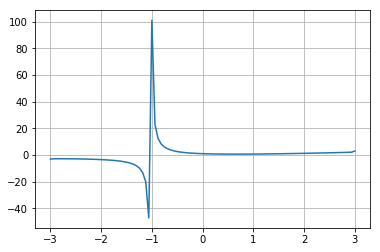

In [7]:
plt.plot(x,phi(x))
plt.grid()

In [8]:
x0 = 0.5
x_cur = x0
x_prev = x0 - 1
eps = 1e-6
it_num_N = 0
k = 0
while np.abs(x_prev - x_cur) > eps:
    x_prev = x_cur
    x_cur = phi(x_cur)
    it_num_N += 1
    if k >= 1000: 
        print("Fignya")
        break
print('Answer = ',  x_cur, "after ", it_num_N, "iterarions")

Answer =  0.6561534966854011 after  4 iterarions


Методу бисекции потребовалось 20 итераций, чтобы найти корень, в то время как Метод Ньютона сделал это за 4 итерации.

# 2.10.5

$ln(xy) - sin(yx^2), 1 <= x <= 2.5; 0.5 <= y <= 2.5$

In [2]:
def func_2(x,y) :
    return np.log(x*y) - np.sin(y*x**2)
def find_sign_change(arr):
    for i in range(len(arr) - 1):
        if arr[i] * arr[i+1] <= 0:
            return i
    return "All has the same sign"

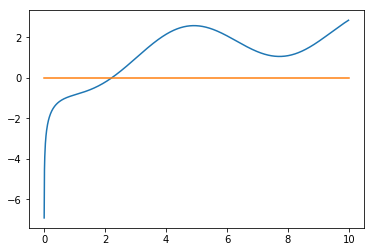

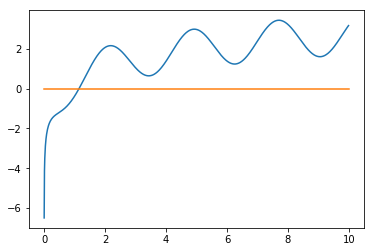

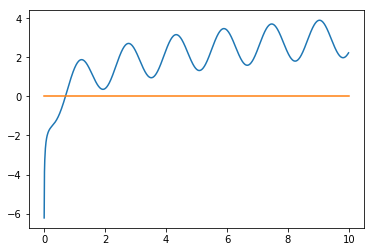

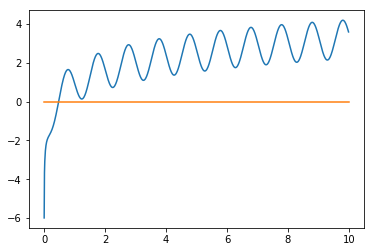

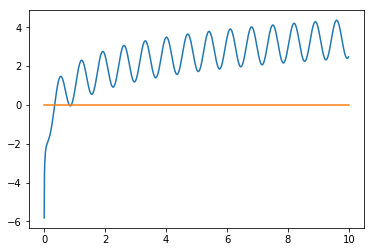

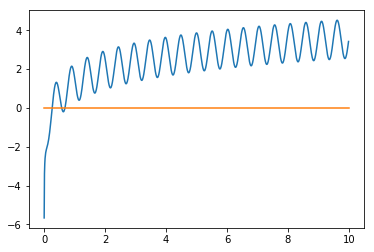

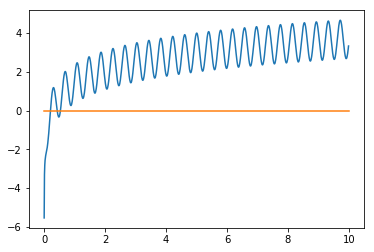

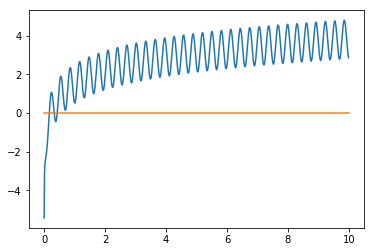

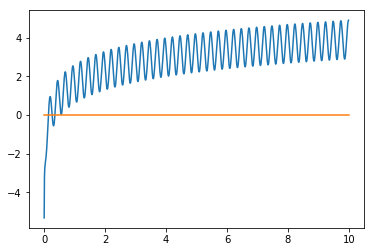

In [3]:
%matplotlib inline
x = np.linspace(1,5,9)
for elm in x:
    fig,ax = plt.subplots()
    ax.plot(np.arange(0.001,10,0.01), func_2(elm * np.ones(1000),np.arange(0.001,10,0.01)))
    ax.plot(np.arange(0.001,10,0.01),np.zeros(1000) )

Видно по графикам, что для первых 4 значений икса корень один. Найдём его.

In [4]:
def binary_2 (a,b,elm, exp = 1e-7):
    it_num = 0
    while np.abs(b-a) > eps:
        it_num += 1
        c = (a + b) / 2
        if func_2(elm,c) * func_2(elm,a) <= 0:
            b = c
        else: a = c
    return (a+b)/2

In [5]:
answer = []
for i in range(4):
    a = 1e-20
    b = 3
    eps = 1e-7
    it_num = 0
    res = binary_2(a,b,x[i],eps)
    answer.append(np.array([res]))
    print(res)

2.2191071659326553
1.143136516213417
0.6997144371271133
0.47501613199710846


<IPython.core.display.Javascript object>


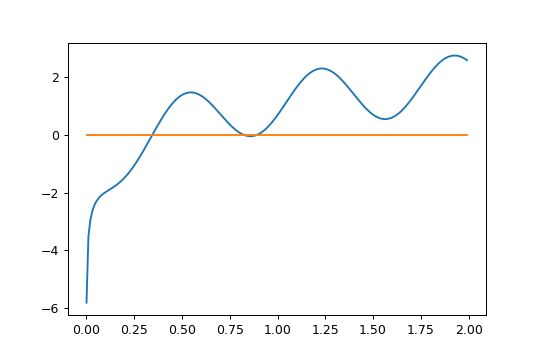

<IPython.core.display.Javascript object>


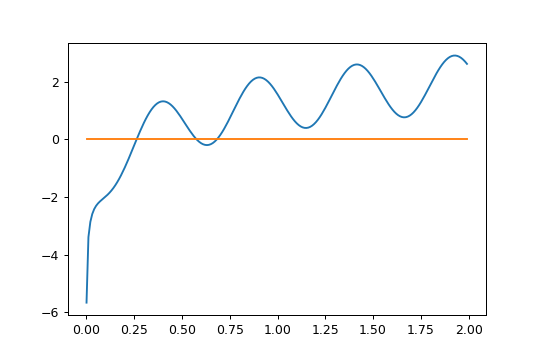

<IPython.core.display.Javascript object>


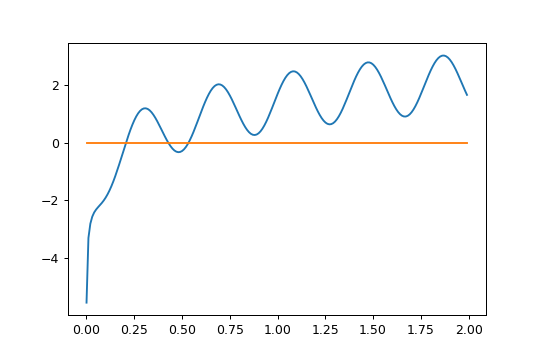

<IPython.core.display.Javascript object>


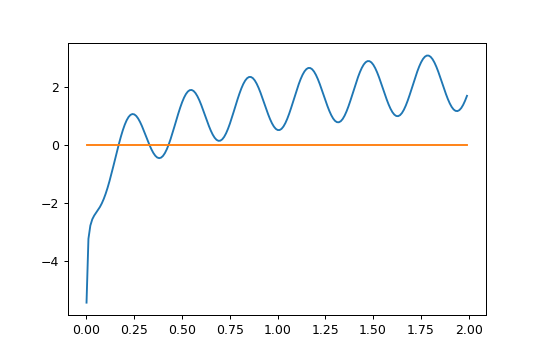

<IPython.core.display.Javascript object>


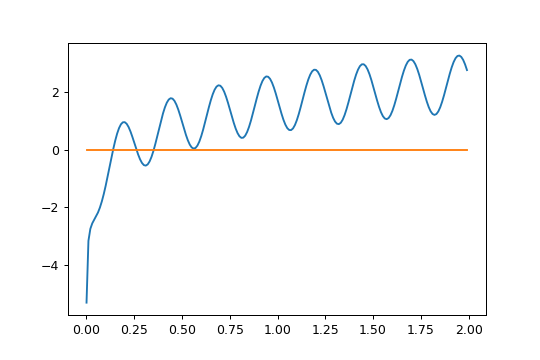

In [21]:
%matplotlib notebook
for i in range(4,len(x)):
    elm = x[i]
    fig,ax = plt.subplots()
    ax.plot(np.arange(0.001,2,0.01), func_2(elm * np.ones(200),np.arange(0.001,2,0.01)))
    ax.plot(np.arange(0.001,2,0.01),np.zeros(200))

Построив графики с %matplotlib notebook нашёл приблизительные значения корней, чтобы затем подбирать интервалы для метода бисекции


x[4] : 0.33  0.82  0.89

x[5] : 0.26  0.57  0.68

x[6] : 0.2   0.42  0.53

x[7] : 0.16  0.32  0.42

x[8] : 0.12  0.26  0.35


In [8]:
answer.append(np.array([binary_2(0.2,0.5,x[4]), binary_2(0.75,0.85,x[4]), binary_2(0.85,0.95,x[4])]))

In [9]:
answer.append(np.array([binary_2(0.2,0.4,x[5]), binary_2(0.47,0.63,x[5]), binary_2(0.63,0.75,x[5])]))

In [10]:
answer.append(np.array([binary_2(0.1,0.3,x[6]), binary_2(0.35,0.47,x[6]), binary_2(0.47,0.63,x[6])]))

In [11]:
answer.append(np.array([binary_2(0.1,0.2,x[7]), binary_2(0.25,0.35,x[7]), binary_2(0.35,0.5,x[7])]))

In [12]:
answer.append(np.array([binary_2(0.07,0.17,x[8]), binary_2(0.2,0.3,x[8]), binary_2(0.3,0.4,x[8])]))

Т.к. у нас получилось несколько корней, мы не сможем построить однозначную функцию y(x), поэтому возьмём только минимальные корни

In [15]:
final_answer = []
for ans in answer:
    final_answer.append(np.min(ans))
final_answer

[2.2191071659326553,
 1.143136516213417,
 0.6997144371271133,
 0.47501613199710846,
 0.34518357515335074,
 0.2631727695465088,
 0.2079314708709717,
 0.1688736438751221,
 0.1401929569244385]

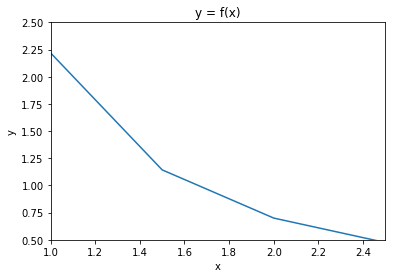

In [22]:
%matplotlib inline
plt.plot(x,final_answer)
plt.title("y = f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(1,2.5)
plt.ylim(0.5,2.5);